<a href="https://colab.research.google.com/github/Bast1-py/Experience-Developing-Projects/blob/main/Explainable_AI_Employee_Retention_Use_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image, HTML, display, display_html
source_tautan = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/01RC2npy7zYd2k6NOvXidQ/cover-image%20-1-%20resized.png"
HTML(f'<div style="text-align: center;"><img src="{source_tautan}" style="max-width: 550px; height: auto;"></div>')

In [ ]:
from IPython.display import Image, HTML, display, display_html
source_tautan = "https://skills.network/logos/SN_web_lightmode.png"
HTML(f'<div style="text-align: center;"><img src="{source_tautan}" style="max-width: 560px; height: auto;"></div>')

# Introduction:

Dalam mengerjakan Tugas ini, Saya akan menganalisis faktor-faktor yang dapat mempengaruhi retensi karyawan - apakah karyawan akan meninggalkan atau menetap di perusahaan dengan menggunakan metode Machine Learning yaitu dengan memanfaatkan klasifikasi model. Fokus utama adalah meningkatkan kemampuan dalam menjelaskan melalui berbagai alat canggih seperti TED_CartesianExplainer, yang memperdayakan para pengambil keputusan untuk memahami tidak hanya dalam memprediksi tetapi juga alasan dibaliknya.

Explainable AI (XAI) sangat penting dalam aplikasi dalam dunia kerja dimana keputusan mempengaruhi orang dan bisnis. dengan menggunakan domain-relevant explanations (TED), tugas ini bisa menunjukkan cara bagaimana tafsir dan mempercayai prediksi model secara efektif. Pembelajaran akan memperoleh pengalaman langsung dalam membangun alur kerja pembelajaran mesin yang dapat ditafsirkan, mengatasi tantangan praproses data, dan mengevaluasi keluaran kemampuan menjelasakan.

Proyek atau tugas ini menyediakan panduan komprehensif untuk mengintegrasikan teknik kemampuan menjelaskan tingkat lanjut ke dalam alur kerja pembelajaran mesin, memastikan hasil yang adil, dapat ditafsirkan, dan dapat ditindaklanjuti untuk pengambilan keputusan bisnis.

Tutorial ini menggunakan kumpulan data Retensi Karyawan. Kumpulan data tersebut berisi informasi tentang karyawan, seperti gaji, departemen, dan workload, dengan variabel target yang menunjukkan apakah seorang karyawan bertahan atau meninggalkan pekerjaannya. Tujuannya adalah untuk menganalisis faktor-faktor yang mempengaruhi retensi karyawan dan memberikan wawasan yang dapat ditindaklanjuti untuk meningkatkan strategi retensi.

# Objective:

1. Set up environment: untuk bekerja dengan metode explainable AI (XAI) pada kumpulan data retensi karyawan
2. Load dan menelusuri kumpulan data retensi karyawan dengan memahami fitur-fitur yang mempengaruhi keputusan karyawan untuk bertahan atau keluar, seperti gaji, departemen, dan work load.
3. menerapkan teknik XAI untuk meningkatkan interpretabilitas: menggunakan metode yang dapat dijelaskan seperti **TED_CartesianExplainer.**
4. mengevaluasi interpretabilitas model dengan melakukan analisis kontribusi metode XAI dalam membuat prediski yang transparan dan dapat ditindaklanjuti bagi para pengambil keputusan.


Proyek ini akan memberikan keterampilan praktis untuk mengintegrasikan teknik XAI ke dalam alur kerja pembelajaran mesin, dengan fokus pada wawasan yang dapat ditindaklanjuti untuk meningkatkan strategi retensi karyawan.

In [ ]:
# !pip install aix360
# !pip install tensorflow
# !pip install shap
# !pip install --no-deps xport
# !pip install cvxpy
# !pip install ibm-watsonx-ai
# !pip install scikit-optimize

# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split, StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from aix360.algorithms.ted import TED_CartesianExplainer
from sklearn.metrics import confusion_matrix
from ibm_watsonx_ai import APIClient, Credentials
from ibm_watsonx_ai.foundation_models.inference import ModelInference
from ibm_watsonx_ai.foundation_models.utils.enums import DecodingMethods
from ibm_watsonx_ai.metanames import GenTextParamsMetaNames as GenParams

# Explainability Framework: Insights From Multiple Angles:

  1. Feature-level explanations:
* wawasan tingkat fitur mampu membantu profesional SDM memahami dampak atribut tertentu (misalnya: gaji, dan workload) terhadap retensi karyawan.
* **The TED_CartesianExplainer:** mampu menjelasakan berdasarkan fitur, yang memungkinkan tim SDM untuk menentukan faktor-faktor penting yang berkontribusi terhadap pengurangan karyawan.

  2. Comprehensive decision-making:
* dengan fokus pada penjelasan tingkat fitur, analisis ini membekali para pengambil keputusan dengan rekomendasi yang dapat ditindaklanjuti untuk mengatasi tantangan retensi.
* Interpretability memastikan bahwa model selaras dengan tujuan bisnis, yang menawarkan transparansi dalam hasil yang prediktif.


# Data Loading dan Pre-processing

In [ ]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/OZ7t9jYybOTL_3HOQTZ2CA/HR-comma-sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Dataset Descriptions

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [ ]:
df['sales'].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [ ]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

# Data Encoding

In [ ]:
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])
df['sales'] = le.fit_transform(df['sales'])

In [ ]:
# Display The Mapping
label_map = dict(zip(le.classes_, range(len(le.classes_))))
label_map

{'IT': 0,
 'RandD': 1,
 'accounting': 2,
 'hr': 3,
 'management': 4,
 'marketing': 5,
 'product_mng': 6,
 'sales': 7,
 'support': 8,
 'technical': 9}

# Model Training and Model Evaluation

In [ ]:
x = df.drop(columns=['left']) # 'left' is the target column (1=left, 0=stayed)
y = df['left']

In [ ]:
y.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.21, random_state=42, stratify=y)

In [ ]:
def plot_conf_matr(conf_matr, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.winter):
  import itertools

  accuracy = np.trace(conf_matr) / np.sum(conf_matr).astype('float')
  sns.set(font_scale = 1.4)

  plt.figure(figsize = (12, 8))
  plt.imshow(conf_matr, interpolation = 'nearest', cmap = cmap)
  title = '\n' + title + '\n'
  plt.title(title)
  plt.colorbar()

  if classes is not None:
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation = 0)
      plt.yticks(tick_marks, classes)

  if normalize:
      conf_matr = conf_matr.astype('float') / conf_matr.sum(axis = 1)[:, np.newaxis]


  thresh = conf_matr.max() / 1.5 if normalize else conf_matr.max() / 2
  for i, j in itertools.product(range(conf_matr.shape[0]), range(conf_matr.shape[1])):
      if normalize:
          plt.text(j, i, "{:0.2f}%".format(conf_matr[i, j] * 100),
                    horizontalalignment = "center",
                    fontweight = 'bold',
                    color = "white" if conf_matr[i, j] > thresh else "black")
      else:
          plt.text(j, i, "{:,}".format(conf_matr[i, j]),
                    horizontalalignment = "center",
                    fontweight = 'bold',
                    color = "white" if conf_matr[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\n\nAccuracy = {:0.2f}%; Error = {:0.2f}%'.format(accuracy * 100, (1 - accuracy) * 100))
  plt.show()

## 1. Random Forest Model

In [ ]:
rf_model = RandomForestClassifier(random_state=42).fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)
rf_class_report = classification_report(y_test, rf_y_pred, target_names=['Stayed', 'Left'])
print('\t\t\tModel 1.: Random Forest\n')
print('Classification Report:\n\n', rf_class_report, '\n')

			Model 1.: Random Forest

Classification Report:

               precision    recall  f1-score   support

      Stayed       0.99      1.00      0.99      2400
        Left       1.00      0.97      0.98       750

    accuracy                           0.99      3150
   macro avg       0.99      0.98      0.99      3150
weighted avg       0.99      0.99      0.99      3150
 



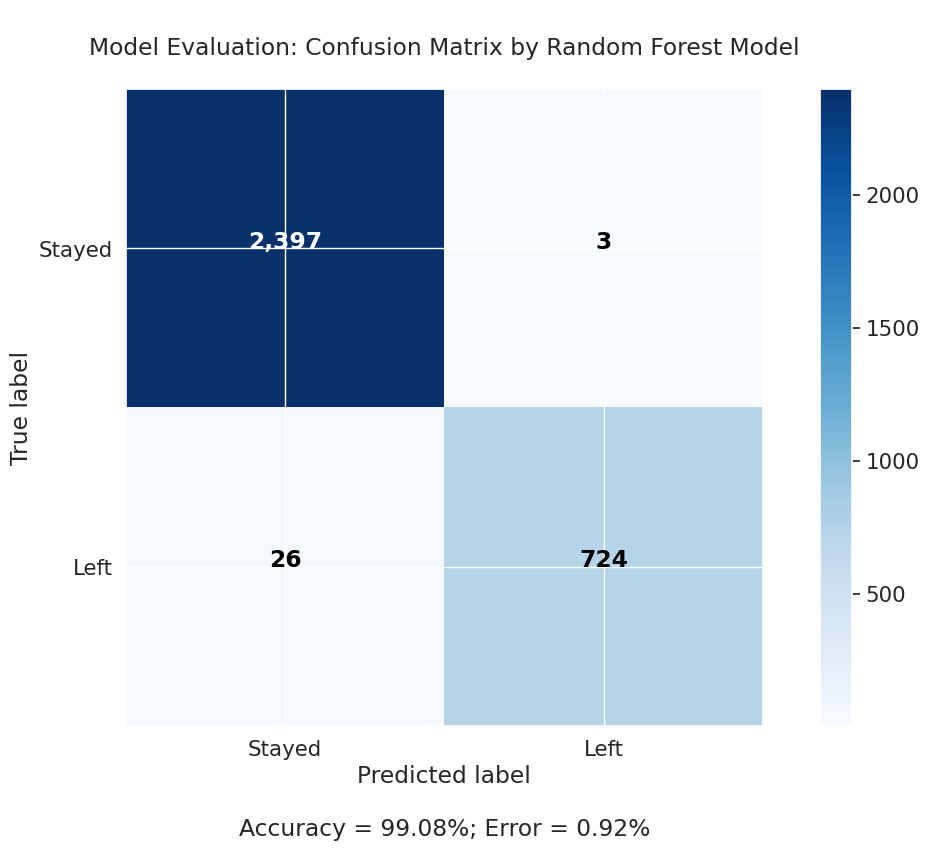

In [ ]:
plot_conf_matr(rf_confusion_matrix, classes=['Stayed', 'Left'], normalize=False, cmap='Blues', title='Model Evaluation: Confusion Matrix by Random Forest Model')

## 2. Support Vector Machine Model

In [ ]:
svc_model = SVC(probability=True, random_state=42).fit(x_train, y_train)
svc_y_pred = svc_model.predict(x_test)
svc_confusion_matrix = confusion_matrix(y_test, svc_y_pred)
svc_class_report = classification_report(y_test, svc_y_pred, target_names=['Stayed', 'Left'])
print('\t\t\tModel 2.: Support Vector Machine\n')
print('Classification Report:\n\n', svc_class_report, '\n')

			Model 2.: Support Vector Machine

Classification Report:

               precision    recall  f1-score   support

      Stayed       0.78      1.00      0.88      2400
        Left       0.99      0.10      0.18       750

    accuracy                           0.78      3150
   macro avg       0.88      0.55      0.53      3150
weighted avg       0.83      0.78      0.71      3150
 



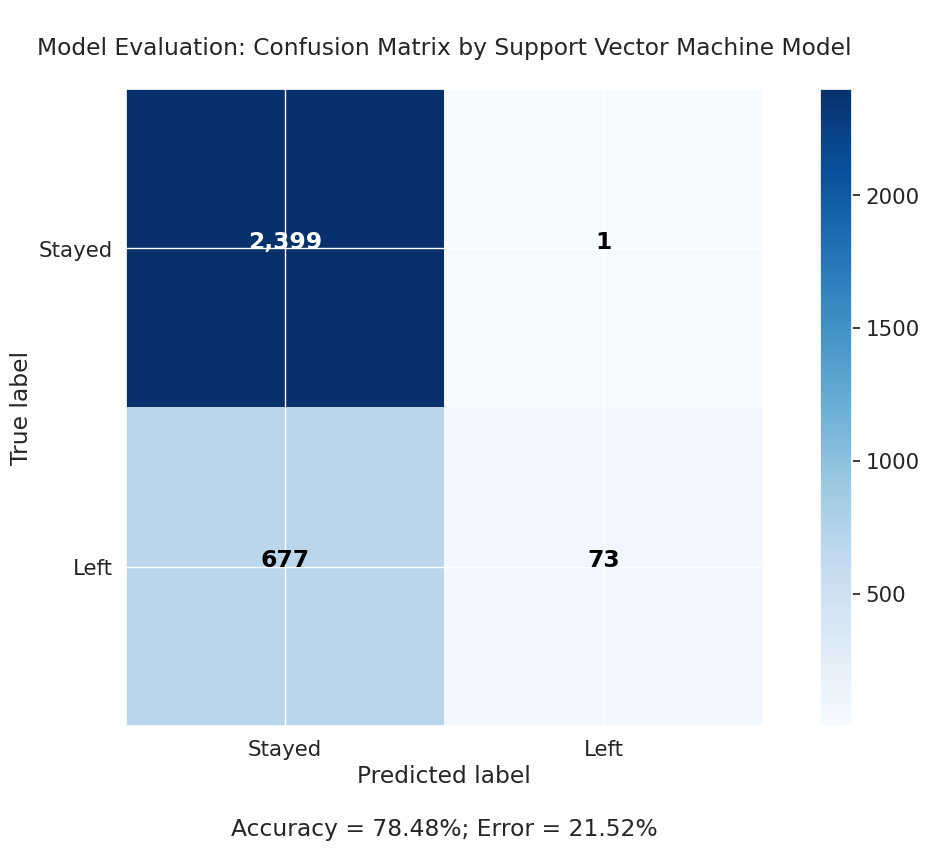

In [ ]:
plot_conf_matr(svc_confusion_matrix, classes=['Stayed', 'Left'], normalize=False, cmap='Blues', title='Model Evaluation: Confusion Matrix by Support Vector Machine Model')

## 3. Decision Tree Model

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)
dt_confusion_matrix = confusion_matrix(y_test, dt_y_pred)
dt_class_report = classification_report(y_test, dt_y_pred, target_names=['Stayed', 'Left'])
print('\t\t\tModel 3.: Decision Tree\n')
print('Classification Report:\n\n', dt_class_report, '\n')

			Model 3.: Decision Tree

Classification Report:

               precision    recall  f1-score   support

      Stayed       0.99      0.98      0.98      2400
        Left       0.94      0.96      0.95       750

    accuracy                           0.98      3150
   macro avg       0.96      0.97      0.97      3150
weighted avg       0.98      0.98      0.98      3150
 



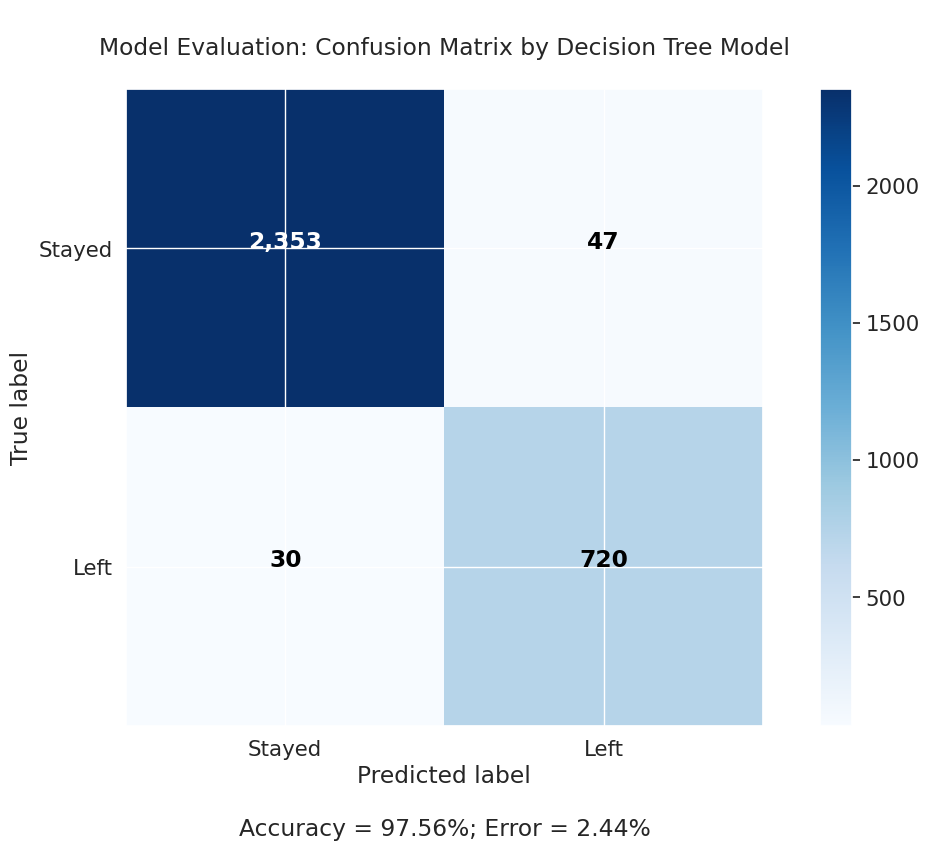

In [ ]:
plot_conf_matr(dt_confusion_matrix, classes=['Stayed', 'Left'], normalize=False, cmap='Blues', title='Model Evaluation: Confusion Matrix by Decision Tree Model')

## 4. AdaBoost Classifiers

In [ ]:
ab_model = AdaBoostClassifier(random_state=42).fit(x_train, y_train)
ab_y_pred = ab_model.predict(x_test)
ab_confusion_matrix = confusion_matrix(y_test, ab_y_pred)
ab_class_report = classification_report(y_test, ab_y_pred, target_names=['Stayed', 'Left'])
print('\t\t\tModel 4.: AdaBoost\n')
print('Classification Report:\n\n', ab_class_report, '\n')

			Model 4.: AdaBoost

Classification Report:

               precision    recall  f1-score   support

      Stayed       0.97      0.97      0.97      2400
        Left       0.89      0.91      0.90       750

    accuracy                           0.95      3150
   macro avg       0.93      0.94      0.93      3150
weighted avg       0.95      0.95      0.95      3150
 



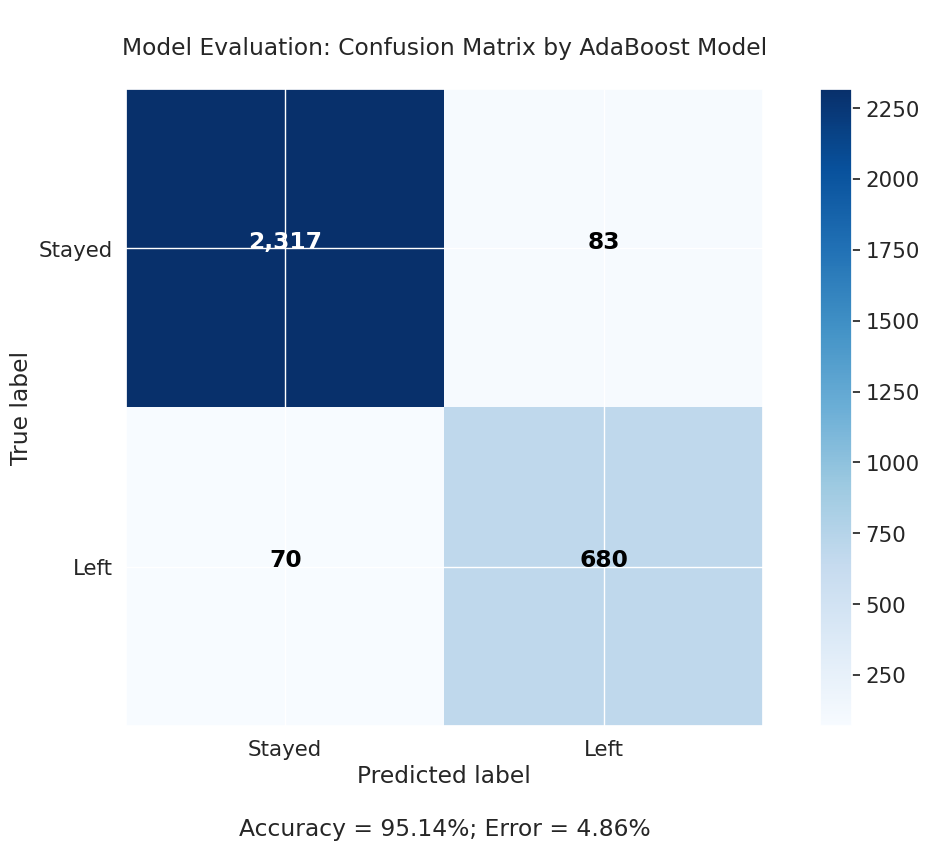

In [ ]:
plot_conf_matr(ab_confusion_matrix, classes=['Stayed', 'Left'], normalize=False, cmap='Blues', title='Model Evaluation: Confusion Matrix by AdaBoost Model')

# Hyperparameter Tuning: Bayesian Optimization

## **Random Forest Model**

In [ ]:
# Penerapan Model Random Forest
# rf_search_space adalah Ruang pencarian hyperparameter yang telah didefinisikan.
rf_search_space = {'criterion': ['gini', 'entropy', 'log_loss'],
                   'max_features': ['sqrt', 'log2', 0.8, 1.0],
                   'n_estimators': Integer(100, 800),
                   'max_depth': Integer(5, 12),
                   'min_samples_split': Integer(2, 10),
                   'min_samples_leaf': Integer(2, 10),
                   'bootstrap': [True, False]}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
rf_bayes_search = BayesSearchCV(rf_model, rf_search_space,
                                cv=cv, scoring='f1',
                                n_iter=42, n_jobs=-1,
                                random_state=42, verbose=False)
rf_bayes_search.fit(x_train, y_train)
print('Parameter Terbaik (Random Forest):', rf_bayes_search.best_params_)
print('-'*230)
print('Akurasi Model Terbaik (Random Forest):', rf_bayes_search.best_score_)
print('-'*230)
print('Parameter Terbaik (Random Forest):', rf_bayes_search.best_estimator_)
print('\n')

Parameter Terbaik (Random Forest): OrderedDict({'bootstrap': False, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 800})
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Akurasi Model Terbaik (Random Forest): 0.9641681042284743
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Parameter Terbaik (Random Forest): RandomForestClassifier(bootstrap=False, max_depth=12, min_samples_leaf=2,
                       n_estimators=800, random_state=42)




In [ ]:
rf_best_params = rf_bayes_search.best_estimator_

In [ ]:
rf_y_pred_best_params = rf_best_params.predict(x_test)
rf_confusion_matrix_best_params = confusion_matrix(y_test, rf_y_pred_best_params)
rf_class_report_best_params = classification_report(y_test, rf_y_pred_best_params, target_names=['Stayed', 'Left'])
print('\t\t\tModel 1.: Random Forest (Fine-tuning)\n')
print('Classification Report:\n\n', rf_class_report_best_params, '\n')

			Model 1.: Random Forest (Fine-tuning)

Classification Report:

               precision    recall  f1-score   support

      Stayed       0.98      1.00      0.99      2400
        Left       0.99      0.95      0.97       750

    accuracy                           0.99      3150
   macro avg       0.99      0.97      0.98      3150
weighted avg       0.99      0.99      0.99      3150
 



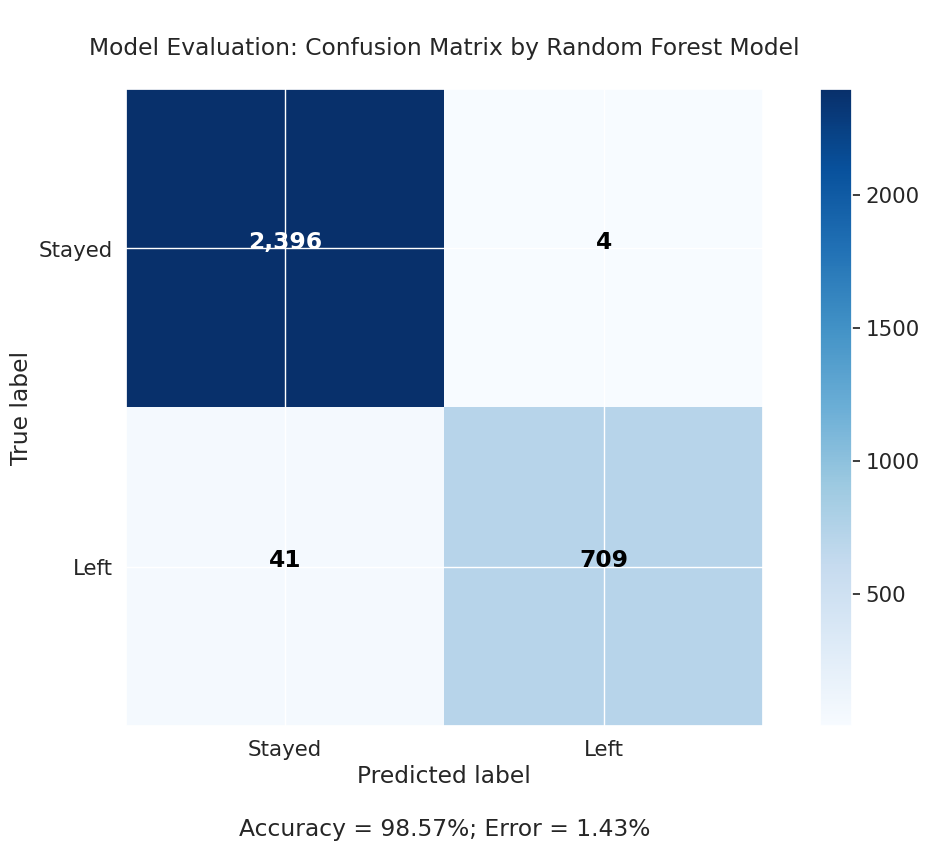

In [ ]:
plot_conf_matr(rf_confusion_matrix_best_params, classes=['Stayed', 'Left'], normalize=False, cmap='Blues', title='Model Evaluation: Confusion Matrix by Random Forest Model')

## **AdaBoost Model**

In [ ]:
# Penerapan Model AdaBoost
ab_model = AdaBoostClassifier(estimator=dt_model, random_state=42)
ab_search_space = {'n_estimators': Integer(100, 800),
                   'learning_rate': Real(0.03, 0.1),
                   'algorithm': ['SAMME'],
                   'estimator__max_depth': Integer(5, 12),
                   'estimator__min_samples_split': Integer(2, 10),
                   'estimator__min_samples_leaf': Integer(2, 10),
                   'estimator__criterion': ['gini', 'entropy'],
                   'estimator__splitter': ['best', 'random'],
                   'estimator__max_features': ['sqrt', 'log2', 0.8]}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
ab_bayes_search = BayesSearchCV(ab_model, ab_search_space,
                                cv=cv, scoring='f1',
                                n_iter=42, n_jobs=-1,
                                random_state=42, verbose=False)
ab_bayes_search.fit(x_train, y_train)
print('Parameter Terbaik (AdaBoost):', ab_bayes_search.best_params_)
print('-'*230)
print('Akurasi Model Terbaik (AdaBoost):', ab_bayes_search.best_score_)
print('-'*230)
print('Parameter Terbaik (AdaBoost):', ab_bayes_search.best_estimator_)
print('\n')

Parameter Terbaik (AdaBoost): OrderedDict({'algorithm': 'SAMME', 'estimator__criterion': 'entropy', 'estimator__max_depth': 12, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 10, 'estimator__min_samples_split': 10, 'estimator__splitter': 'best', 'learning_rate': 0.1, 'n_estimators': 800})
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Akurasi Model Terbaik (AdaBoost): 0.9762808345718715
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Parameter Terbaik (AdaBoost): AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                   

In [ ]:
ab_best_params = ab_bayes_search.best_estimator_

In [ ]:
ab_y_pred_best_params = ab_best_params.predict(x_test)
ab_confusion_matrix_best_params = confusion_matrix(y_test, ab_y_pred_best_params)
ab_class_report_best_params = classification_report(y_test, ab_y_pred_best_params, target_names=['Stayed', 'Left'])
print('\t\t\tModel 2.: AdaBoost (Fine-tuning)\n')
print('Classification Report:\n\n', ab_class_report_best_params, '\n')

			Model 2.: AdaBoost (Fine-tuning)

Classification Report:

               precision    recall  f1-score   support

      Stayed       0.99      1.00      0.99      2400
        Left       0.99      0.97      0.98       750

    accuracy                           0.99      3150
   macro avg       0.99      0.98      0.99      3150
weighted avg       0.99      0.99      0.99      3150
 



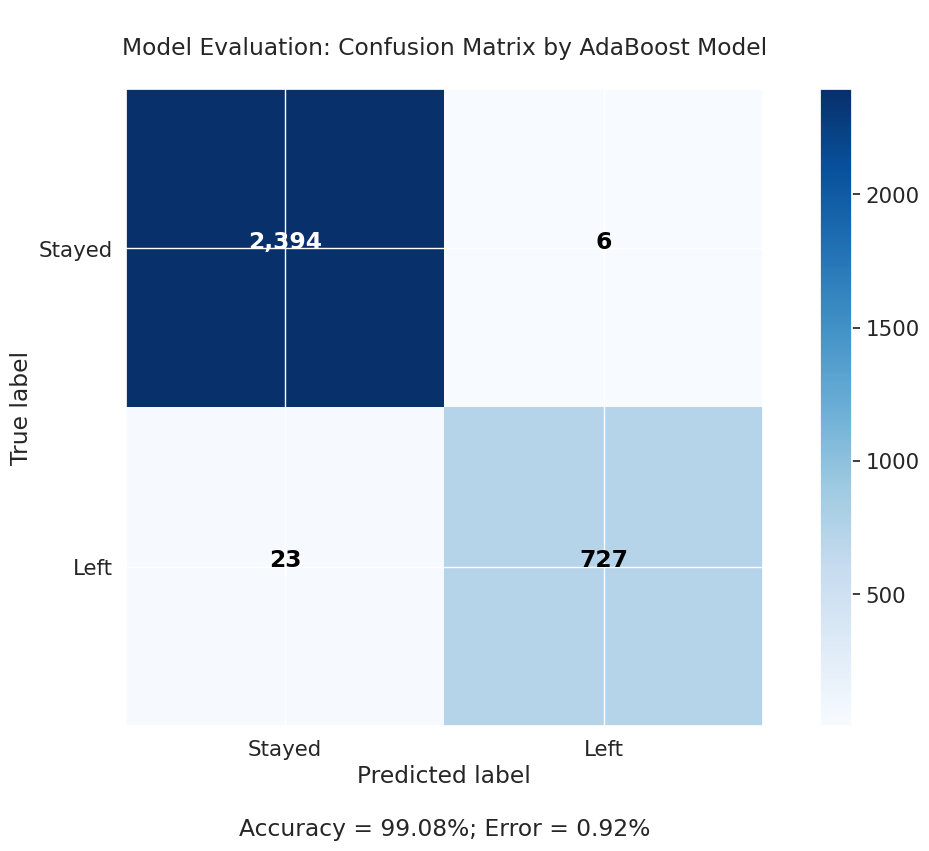

In [ ]:
plot_conf_matr(ab_confusion_matrix_best_params, classes=['Stayed', 'Left'], normalize=False, cmap='Blues', title='Model Evaluation: Confusion Matrix by AdaBoost Model')

# Insight From The Confusion Matrix from **Random Forest Model**:

Setelah dilakukan tahap ini, didapatkan bahwa train_test_split data yang siap untuk di testing dalam melakukan model prediction sebanyak 3150. Ada sebanyak 2396 data karyawan yang **Stay** dan sebanyak 709 data karyawan yang **Left.** Disini model memberikan model yang akurat dalam memperkirakan karyawan **Stay** ataupun karyawan **Left** sebesar 98.6% tingkat keberhasilan model memberikan hasil prediksi dengan akurat. Dari model sebesar 98.6% itu, model memprediksi sebanyak 2396 karyawan akan **Stay** dan sebanyak 709 di perkirakan akan **Left** dari perusahaan. Berikut kesimpulan singkat terkait hasil yang diperkirakan oleh model.

1. Correct Predictions:
model mampu memprediksi dengan tepat 709 karyawan yang **Left** dan sebanyak 2396 karyawan yang **Stay**.

2. Incorrect Prediction:
  * False Positive sebanyak 4 karyawan yang diprediksikan akan **Left** tetapi mereka **Stay**.
  * False Negative sebanyak 41 karyawan yang diprediksi akan **Stay**, tetapi mereka **Left**.

3. Key takeaways:
  * Model yang digunakan merupakan hasil terbaik dari model yang diuji. Model mampu bekerja dengan hasil yang baik secara keseluruhan, dengan sebagian besar prediksi akurat.
  * pengurangan False Negative (karyawan yang **Left** tetapi diprediksi akan **Stay**) harus diprioritaskan, karena kasus-kasus ini penting yang meningkatkan strategi retensi.

# Insight From The Confusion Matrix from **AdaBoost Model:**

Setelah dilakukan tahap ini, didapatkan bahwa train_test_split data yang siap untuk di testing dalam melakukan model prediction sebanyak 3150. Ada sebanyak 2394 data karyawan yang **Stay** dan sebanyak 727 data karyawan yang **Left**. Disini model memberikan model yang akurat dalam memperkirakan karyawan **Stay** ataupun karyawan **Left** sebesar 99% tingkat keberhasilan model memberikan hasil prediksi dengan akurat. Dari model sebesar 99% itu, model memprediksi sebanyak 2394 karyawan akan **Stay** dan sebanyak 727 di perkirakan akan **Left** dari perusahaan. Berikut kesimpulan singkat terkait hasil yang diperkirakan oleh model.

1. Correct Predictions: model mampu memprediksi dengan tepat 727 karyawan yang **Left** dan sebanyak 2394 karyawan yang **Stay**.

2. Incorrect Prediction:

  * False Positive sebanyak 6 karyawan yang diprediksikan akan **Left** tetapi mereka **Stay**.
  * False Negative sebanyak 23 karyawan yang diprediksi akan **Stay**, tetapi mereka **Left**.

3. Key takeaways:

  * Model yang digunakan merupakan hasil terbaik dari model yang diuji. Model mampu bekerja dengan hasil yang baik secara keseluruhan, dengan sebagian besar prediksi akurat.
  * pengurangan False Negative (karyawan yang **Left** tetapi diprediksi akan **Stay**) harus diprioritaskan, karena kasus-kasus ini penting yang meningkatkan strategi retensi.

# SHAP KernelExplainer

1. What is SHAP?
  * SHAP (SHapley Additive exPlanations) adalah kerangka kerja yang membantu untuk memahami bagaimana model pembelajaran mesin dengan menjelaskan hasil prediksinya.
  * kerangka kerja ini menetapkan nilai penting untuk setiap fitur dalam data guna menunjukkan seberapa besar kontribusi setiap fitur terhadap prediksi tertentu.
  * Mengapa dan dimana kita menggunakan SHAP?
    * SHAP bisa digunakan untuk membuat model pembelajaran mesin black-box (misalnya, Random Forest atau Neural Networks) dapat ditafsirkan dan dipahami.
    * misalnya, untuk pengerjaan khasus ini membantu untuk menjelaskan mengapa model tersebut memprediksi bahwa seseorang karyawan akan **Left** berdasarkan fitur-fitur seperti gaji, tingkat kepuasan, dan workload.

2. Apa itu nilai Shapley?
  * nilai shapeley berasal dari teori permainan kooperatif. nilai ini mengukur seberapa besar kontribusi setiap "pemain" (atay dalam kasus kita, setiap fitur) terhadap "permainan" (atau prediksi model).

  * bayangkan setiap fitur dalam kumpulan data adalah pemain yang berkontribusi terhadap prediksi akhir. nilai shapeley untuk suatu fitur memberi tahu kita seberapa besar fitur tersebut membantu atau merugikan prediksi, dengan mempertimbangkan semua kemungkinan kombinasi fitur.

  * penjelasan sederhana:
    * misalnya, jika prediksinya adalah seorang karyawan akan **Left**, nilai Shapeley mungkin memberi tahu kita bahwa "low satisfaction" berkontribusi 60% terhadap prediksi, "high workload" berkontribusi 30%, dan "low salary" berkontribusi 10%.

  * mengapa dan dimana kita menggunakan nilai shapeley?
    * nilai ini memungkinkan kita untuk menetapkan penghargaan secara adil dan tepat kepada fitur atas perannya dalam prediksi.
    * pada tugas ini, nilai shapeley digunakan untuk mengidentifikasi faktor-faktor utama yang mempengaruhi retensi karyawan, sehingga keputusan model menjadi lebih transparan.

3. What is KernelExplainer?
  * The Shap KernelExplainer adalah alat dalam SHAP yang bekerja dengan semua jenis model pembelajaran mesin, bahkan yang paling rumit seperti Random Forest atau Neural Networks.
  * Alat ini menghitung nilai Shapley menggunakan Weighted Linear Regression, yang menyederhanakan cara kita menghitung pentingnya setaip fitur.
  * Weighted Linear Regression menambahkan sesuatu alat ini akan memberikan lebih banyak importance (weight) pada titik data tertentu saat menemukan garis yang paling sesuai. Dalam KernelExplainer, alat ini membantu fokus pada titik data yang paling relevan untuk prediksi tertentu.
  * pada khasus ini, alat ini membantu untuk menghitung seberapa penting setiap fitur (misalnya, gaji, satisfaction) bagi model's decision.


bagaimana fitur ini dapat memberikan kontribusi?

1. Feature-level Insights: SHAP KarnelExplainer memberi tahu kita secara tepat bagaimana setiap fitur mempengaruhi prediksi model untuk seorang karyawan (misalnya, "low satisfaction level" meningkatkan kemungkinan **Left**
2. Transparansi model: fitur ini mampu membuat RandomForestClassifier lebih mudah ditafsirkan dengan menjelaskan alasan model membuat keputusan tertentu.
3. Actionable Insight: dengan mengidentifikasi model fitur yang mendorong **Left** karyawan fitur ini membantu tim SDM untuk fokus pada area memerlukan perhatian (misalnya, improving satisfaction or Reducing Workload).
4. A Complete Explanation Framework: dikombinasikan dengan teknik lain seperti Protodash, SHAP KernelExplainer memberikan pemahaman yang lebih mendalam tentang perilaku model pada tingkat fitur.
5. Singkatnya, SHAP KernelExplainer adalah alat penting dalam proyek ini, yang mampu membantu membuat prediksi dapat ditafsirkam, ditindaklanjuti, dan dapat dipercayai.

In [ ]:
from IPython.display import Image, HTML, display, display_html
source_tautan = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/HS7LoDmOqmCYVMyA5lkzfw/Employee%20Retention.png"
HTML(f'<div style="text-align: center;"><img src="{source_tautan}" style="max-width: 650px; height: auto;"></div>')

# Penjelasan Digram:

dari diagram ini menggambarkan bagaimana model pembelajaran mesin memprediksi retensi karyawan dengan menganalisis faktor-faktor utama seperti gaji, tingkat kepuasan, dan workload. variabel masukan ini berfungsi sebagai kontibutor bagi model, yang mempengaruhi hasil prediksi.

# Implementation SHAP KernelExplainer

## **Random Forest Model**

In [ ]:
# initialize SHAP KernelExplainer
rf_explainer = shap.KernelExplainer(rf_best_params.predict_proba, shap.kmeans(x_train, 10)) # sampling to reduce computation
rf_explainer

In [ ]:
rf_shap_values = rf_explainer(x_test) # this will return explanation object

  0%|          | 0/3150 [00:00<?, ?it/s]

In [ ]:
# shap_values

untuk menghasilkan nilai SHAP menggunakan **x_test** untuk menemukan pentingnya fitur. Setelah mendapatkan nilai SHAP, akan divisualisasikan Feature Importance menggunakan fungsi summary_plot

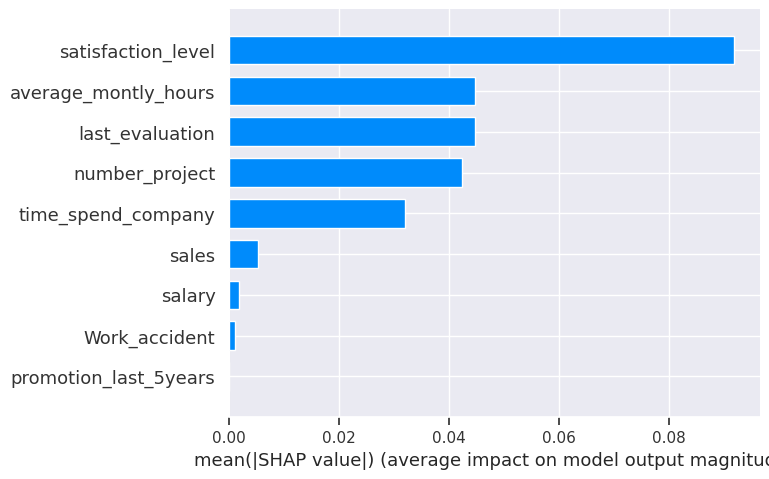

In [ ]:
# plot summary dari SHAP values untuk kelas 1 (karyawan yang Left)
shap.summary_plot(rf_shap_values[...,1], x_test, plot_type='bar', feature_names=x.columns)

plot ini mampu memberikan wawasan terkait model prediction mengenai **satisfaction level** yang merupakan faktor paling signifikan yang mempengaruhi prediksi **retensi karyawan.** kemudian ada **last_evaluation, average_montly_hours, number_project, and time_spend_company.** fitur-fitur utama ini menunjukkan bahwa satisfaction dan metrik kinerja karyawan memainkan peran penting dalam model prediksi terjadinya **pengurangan karyawan**. fitur yang memiliki kurang berdampak menunjukkan bahwa fitur-fitur tersebut berkontribusi minimal terhadap prediksi moel dalam keseluruhan data.

## **AdaBoost Model**

In [ ]:
# initialize SHAP KernelExplainer
ab_explainer = shap.KernelExplainer(ab_best_params.predict_proba, shap.kmeans(x_train, 10)) # sampling to reduce computation
ab_explainer

In [ ]:
ab_shap_values = ab_explainer(x_test) # this will return explanation object

  0%|          | 0/3150 [00:00<?, ?it/s]

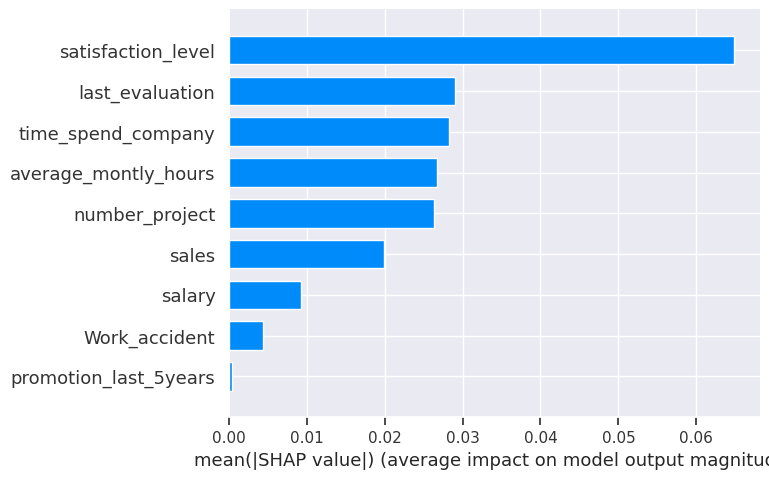

In [ ]:
# plot summary dari SHAP values untuk kelas 1 (karyawan yang Left)
shap.summary_plot(ab_shap_values[...,1], x_test, plot_type='bar', feature_names=x.columns)

plot ini mampu memberikan wawasan terkait model prediction mengenai **satisfaction level** yang merupakan faktor paling signifikan yang mempengaruhi prediksi **retensi karyawan**. kemudian ada **average_montly_hours, last_evaluation, time_spend_company, and number_project.** fitur-fitur utama ini menunjukkan bahwa satisfaction dan metrik kinerja karyawan memainkan peran penting dalam model prediksi terjadinya **pengurangan karyawan.** fitur yang memiliki kurang berdampak menunjukkan bahwa fitur-fitur tersebut berkontribusi minimal terhadap prediksi moel dalam keseluruhan data.

Kedua model hampir memberikan sudut pandang dengan memperkirakan retensi karyawan terjadi banyak dipengaruhi oleh **satisfaction_level** yang tinggi dan **average_montly_hours dan last_evaluation** ada diposisi kedua dan ketiga dengan menunjukkan value SHAP yang hampir mendekati.

# Implementation Feature Importance:

## **Random Forest Model:**

**Random Forest** adalah model yang mampu memberikan pentingnya fitur dengan menunjukkan seberapa besar kontribusi masing-masing fitur untuk mengurangi kesalahan dalam model. disisi lain, **SHAP menjelaskan dampak masing-masing fitur pada prediksi individual.** Sementara, **Random Forest memberikan pandangan secara menyeluruh terhadap semua kelas.** SHAP memberikan wawasan terperinci untuk prediksi tertentu

                 Feature  Importance
0     satisfaction_level    0.342798
4     time_spend_company    0.194606
2         number_project    0.190242
3   average_montly_hours    0.141316
1        last_evaluation    0.115209
7                  sales    0.005805
8                 salary    0.004827
5          Work_accident    0.004735
6  promotion_last_5years    0.000461


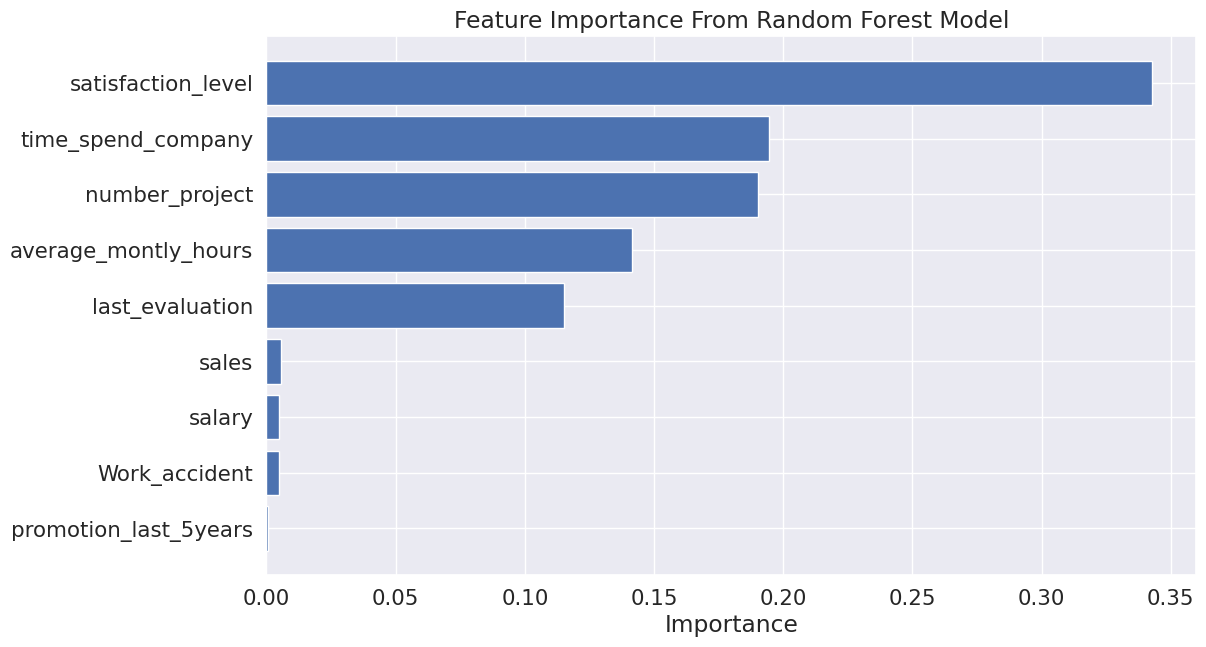

In [ ]:
rf_fi = rf_best_params.feature_importances_
rf_feature_names = x.columns

# Display Feature Importance
rf_fi_df = pd.DataFrame({'Feature': rf_feature_names,
                      'Importance': rf_fi})
rf_fi_df = rf_fi_df.sort_values(by='Importance', ascending=False)
print(rf_fi_df)

plt.figure(figsize=(12,7))
plt.barh(rf_fi_df['Feature'],
         rf_fi_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance From Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

## **AdaBoost Model:**

                 Feature  Importance
3   average_montly_hours    0.254158
0     satisfaction_level    0.249143
1        last_evaluation    0.190637
4     time_spend_company    0.099227
2         number_project    0.086403
7                  sales    0.072526
8                 salary    0.033412
5          Work_accident    0.011909
6  promotion_last_5years    0.002584


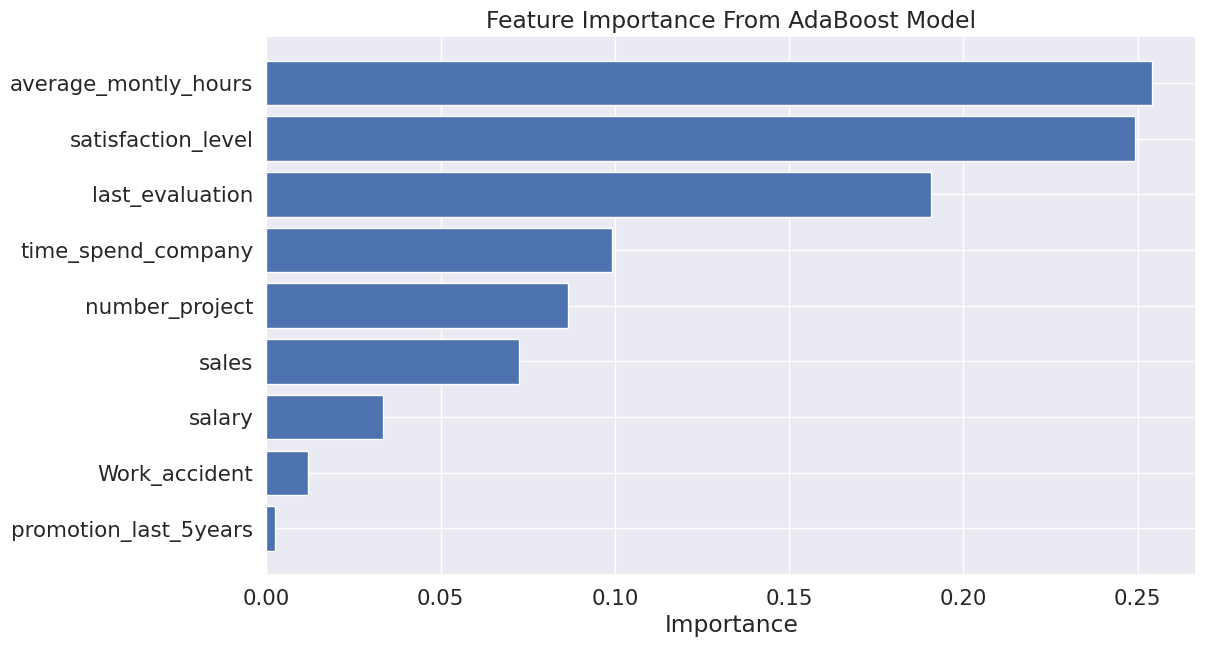

In [ ]:
ab_fi = ab_best_params.feature_importances_
ab_feature_names = x.columns

# Display Feature Importance
ab_fi_df = pd.DataFrame({'Feature': ab_feature_names,
                      'Importance': ab_fi})
ab_fi_df = ab_fi_df.sort_values(by='Importance', ascending=False)
print(ab_fi_df)

plt.figure(figsize=(12,7))
plt.barh(ab_fi_df['Feature'],
         ab_fi_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance From AdaBoost Model')
plt.gca().invert_yaxis()
plt.show()

# Insight from Feature Importance:

  1. **Random Forest** memberikan interpretasi plot penting yang menunjukkan bahwa **satisfaction level** sebagai prediktor teratas untuk **retensi karyawan**. Pada model yang lainnya bahwa **AdaBoost** juga memberikan interpretasi yang sama bahwa retensi karyawan disebabkan oleh fitur **satisfaction level.**
  2. fitur pendukung yang mengakibatkan retensi karyawan adalah:
    * **Random Forest** menghasilkan interpretasi fitur:
      * time_spend_company
      * number project
      * average_montly_hours.
    * **AdaBoost** menghasilkan interpretasi fitur:
      * average_montly_hours
      * last_evaluation
      * time_spend_company
  3. fitur yang kurang berdampak untuk retensi karyawan adalah:
    * **Random Forest**:
      * promotion_last_5years
      * salary
      * work_accident
      * sales
    * **AdaBoost:**
      * promotion_last_5years
      * work_accident
      * salary
      * sales
  4. Kedua Model yaitu **Random Forest** dan **AdaBoost** dan kedua metode yaitu **SHAP** dan **Feature Importance** menyoroti interpretasi fitur yang hampir sama, tetapi **SHAP memberikan wawasan yang lebih mendalam** dengan menjelaskan bagaimana fitur-fitur ini memberika pengaruh prediksi individual.

# Explanation Mapping

  tahap ini untuk mendefenisikan pemetaan yang menghubungkan kemungkinan alasan **pergantian karyawan** dengan kode penjelasan yang unik. Fungsi **generate_explanation_code** menyelaraskan peringkai nilai SHAP dengan faktor-faktor yang diprioritaskan (misalnya, satisfaction, workload, gaji) untuk mengidentifikasi alasan utama dibalik setiap prediksi. hal ini memastikan penjelasan menyoroti faktor yang paling berdampak, menawarkan wawasan yang jelas dan dapat ditindaklanjuti kepada tim SDM untuk mengatasi tantangan retensi.

In [ ]:
# Define explanation mapping with unique codes for each explanation
expl_mapping = {
    "Low satisfaction level may lead to leaving.": 1,
    "Low performance with a high workload.": 2,
    "High monthly hours may lead to burnout.": 3,
    "Long tenure with no promotion can increase likelihood of leaving.": 4,
    "Low salary is a common reason for attrition.": 5,
    "No strong indicators for leaving.": 0  # Default explanation when no significant factors are found
}

# Generate a single explanation code based on priority
def generate_explanation_code(row):
    # Define priority of explanations: satisfaction > workload > hours > tenure > salary
    if row['satisfaction_level'] < 0.4:
        return expl_mapping["Low satisfaction level may lead to leaving."]
    elif row['last_evaluation'] < 0.5 and row['number_project'] >= 5:
        return expl_mapping["Low performance with a high workload."]
    elif row['average_montly_hours'] > 250:
        return expl_mapping["High monthly hours may lead to burnout."]
    elif row['time_spend_company'] > 3:
        return expl_mapping["Long tenure with no promotion can increase likelihood of leaving."]
    elif row['salary'] == 0:  # low salary
        return expl_mapping["Low salary is a common reason for attrition."]
    else:
        return expl_mapping["No strong indicators for leaving."]

In [ ]:
# menentukan pemetaan penjelasan dengan kode unik untuk setiap penjelasan
expl_mapping = {"Low Satisfaction Level May Lead To Leaving.": 1,
                "Low Performance With A High Workload.": 2,
                "High Montly Hours May Lead To Burnout.": 3,
                "Long Tenure With No Promotion Can Increase Likelihood Of Leaving.": 4,
                "Low Salary Is A Common Reason For Attrition.": 5,
                "No Strong Indicators For Leaving.": 0}     # penjelasan dafault ketika tidak ditemukan faktor signifikan

# Menghasilkan kode penjelasan tunggal berdasarkan prioritas
def generate_explanation_code(row):
  # tentukan prioritas penjelasan: satisfaction > workload > hours > tenure > salary
  if row['satisfaction_level'] < 0.4:
    return expl_mapping["Low Satisfaction Level May Lead To Leaving."]
  elif row['last_evaluation'] < 0.5 and row['number_project'] >=5:
    return expl_mapping["Low Performance With A High Workload."]
  elif row['average_montly_hours'] > 250:
    return expl_mapping["High Montly Hours May Lead To Burnout."]
  elif row['time_spend_company'] > 3:
    return expl_mapping["Long Tenure With No Promotion Can Increase Likelihood Of Leaving."]
  elif row['salary'] == 0:
    return expl_mapping["Low Salary Is A Common Reason For Attrition."]
  else:
    return expl_mapping["No Strong Indicators For Leaving."]

In [ ]:
df['Explanation'] = df.apply(generate_explanation_code, axis=1)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Explanation
0,0.38,0.53,2,157,3,0,1,0,7,1,1
1,0.80,0.86,5,262,6,0,1,0,7,2,3
2,0.11,0.88,7,272,4,0,1,0,7,2,1
3,0.72,0.87,5,223,5,0,1,0,7,1,4
4,0.37,0.52,2,159,3,0,1,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1,0
14995,0.37,0.48,2,160,3,0,1,0,8,1,1
14996,0.37,0.53,2,143,3,0,1,0,8,1,1
14997,0.11,0.96,6,280,4,0,1,0,8,1,1


In [ ]:
flipped_dict = {value: key for key, value in expl_mapping.items()}
flipped_dict

{1: 'Low Satisfaction Level May Lead To Leaving.',
 2: 'Low Performance With A High Workload.',
 3: 'High Montly Hours May Lead To Burnout.',
 4: 'Long Tenure With No Promotion Can Increase Likelihood Of Leaving.',
 5: 'Low Salary Is A Common Reason For Attrition.',
 0: 'No Strong Indicators For Leaving.'}

In [ ]:
[flipped_dict[i] for i in df[df['left']==1]['Explanation'].to_list()[0:10]]

['Low Satisfaction Level May Lead To Leaving.',
 'High Montly Hours May Lead To Burnout.',
 'Low Satisfaction Level May Lead To Leaving.',
 'Long Tenure With No Promotion Can Increase Likelihood Of Leaving.',
 'Low Satisfaction Level May Lead To Leaving.',
 'No Strong Indicators For Leaving.',
 'Low Satisfaction Level May Lead To Leaving.',
 'High Montly Hours May Lead To Burnout.',
 'Long Tenure With No Promotion Can Increase Likelihood Of Leaving.',
 'No Strong Indicators For Leaving.']

memfilter baris dalam dataframe df yang mana left==1 adalah karyawan yang **Left** dan mengambil 5 kode penjelasan pertama dari kolom penjelasan sebagai daftar.

# Training The TED_CartesianExplainer Model:

adalah alat bantu dalam **explainability** yang menghubungkan prediksi pembelajaran mesin dengan **human-readable explanations**. hal ini membuat model yang rumit menjadi lebih mudah dipahami oleh end user, seperti SDM atau manajer.

  * TED_CartesianExplainer dapat memetakan fitur atau kombinasi fitur ke penjelasan yang telah ditetapkan sebelumnya, membantu dalam interpretasi prediksi dalam konteks.

  * TED_CartesianExplainer dapat menjelaskan prediksi seperti "Low satisfaction level may lead to leaving" berdasarkan dampak fitur.

  * TED_CartesianExplainer dapat mengintegrasikan dan menjelaskan ke dalam framework terpadu, memastikan kejelasan dan konsistensi.

|Aspect|TED_CartesianExplainer| Traditional Models|
|-------------------------------|---------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
|**Focus on Explanations**| Memberikan wawasan tingkat fitur yang terkait dengan prediksi, menjadikannya dapat ditindaklanjuti (misalnya: "Gaji rendah mempengaruhi tingkat Left Karyawan").| Memprediksi hasil tetapi ridak secara inheren memberikan alasan dibalik prediksi. |
|**Integration of Explanations**| Menggabungkan prediksi dan penjelasan dalam satu framework untuk konsistensi. | Memerlukan alat tambahan seperti SHAP atau LIME untuk penjelasan pasca-hoc. |
|**Actionable Insights**| Menyoroti faktor-faktor kritis untuk pengambilan keputusan selaras dengan pengetahuan domain. | Fokus pada kinerja tetapi kurang memiliki interpretabilitas bawaan |

# Mengapa Menggunakan TED untuk mempertahankan karyawan?

  * explain prediction: pahami mengapa model memprediksi seorang karyawan akan keluar atau bertahan.
  * Highlight Key Factors: identifikasi faktor-faktor penting seperti satisfaction yang rendah atau workload yang tinggi.
  * Build Trust: memungkinkan tim SDM untuk mempercayai prediksi AI dengan penjelasan yang jelas dan dapat ditafsirkan.

Dengan mengubungkan prediksi ke fitur-fitur tertentu, TED_CertesianExplainer memberikan wawasan yang dapat ditindaklanjuti untuk mengatasi tantangan **retensi karyawan** secara efektif.

# Employee Retention Example With Explanations using TED Framework.

Pada contoh ini akan menjelaskan bagaimana Framework TED dapat digunakan untuk mengklasifikasi prediksi retensi karyawan dan memberikan penjelasan yang berarti untuk setiap satisfaction. Framework ini mencakup kumpulan data reguler, kumpulan data tambahan dengan penjelasan, dan penalaran, beserta label bilangan bulat baru (Y).

| **Feature 1**                | **Feature 2**              | **Feature 3**               | **Label (Y)**             |
|-------------------------------|----------------------------|-----------------------------|----------------------------|
| Low Satisfaction              | High Workload             | Low Salary                 | Left                      |
| High Satisfaction             | Moderate Workload         | High Salary                | Stayed                    |
| Low Satisfaction              | High Workload             | High Salary                | Left                      |
| Moderate Satisfaction         | Moderate Workload         | High Salary                | Stayed                    |
| Low Satisfaction              | Moderate Workload         | Low Salary                 | Left                      |

  * Alasan Left: Low Satisfaction atau high workload
  * Alasan Stay: High Satisfaction dan gaji tinggi atau low workload.


Augmented dataset yang diperbesar dengan label integer (Y'). Framework TED menetapkan integer unik (Y') untuk setiap kombinasi (Y) (decision) dan (E) (explanation).

| **Feature 1**                | **Feature 2**              | **Feature 3**               | **Label (Y)**             | **Explanation (E)**                         | **Label (Y')**   |
|-------------------------------|----------------------------|-----------------------------|----------------------------|---------------------------------------------|------------------|
| Low Satisfaction              | High Workload             | Low Salary                 | Left                      | Low satisfaction                            | 1                |
| High Satisfaction             | Moderate Workload         | High Salary                | Stayed                    | High satisfaction and high salary           | 3                |
| Low Satisfaction              | High Workload             | High Salary                | Left                      | High workload                               | 2                |
| Moderate Satisfaction         | Moderate Workload         | High Salary                | Stayed                    | Moderate workload                           | 4                |
| Low Satisfaction              | Moderate Workload         | Low Salary                 | Left                      | Low salary                                  | 5                |

  sekarang, mari dikerjakan tugas yang berkaitan ini untuk lebih dalam memahami studi khasus yang ingin dijalaskan. Dataset akan terdiri tiga bagian, X (seluruh dataset tanpa fitur kiri dan penjelasan), Y (kolom target kiri) dan E (berisi semua penjelasan yang kita petakan.

In [ ]:
X = df.drop(columns=['left','Explanation'])
Y = df['left']
E = df['Explanation']

X_train, X_test, Y_train, Y_test, E_train, E_test = train_test_split(X,Y,E, test_size=0.22, random_state=42, stratify=y)

  Sekarang, akan menginisialisasi **TED_CartesianExplainer**, sebuah alat dari **AIX360**, dengan sebuah model pembelajaran mesin (misalnya RandomForestClassifier atau AdaBoostClassifier). Penjelasan ini mengaitkan prediksi model dengan penjelasan yang telah ditetapkan sebelumnya dan dapat dibaca oleh manusia, yang memungkinkan wawasan tingkat fitur mengenai alasan mengapa prediksi tertentu dibuat. dengan menghubungkan fitur ke penjelasan yang relevan dengan domain, hal ini meningkatkan interpretabilitas dan kepercayaan model.

# TED_CartesianExplainer:

## **Random Forest Model**

In [ ]:
rf_estimator = rf_best_params
rf_ted = TED_CartesianExplainer(rf_estimator)

In [ ]:
print('Training The Random Forest Classifier')
print('='*35)
rf_ted.fit(X_train, Y_train, E_train)   # train Random Forest classifier
print('\nRandom Forest Training Finished')

Training The Random Forest Classifier

Random Forest Training Finished


## **AdaBoost Model**

In [ ]:
ab_estimator = ab_best_params
ab_ted = TED_CartesianExplainer(ab_estimator)

In [ ]:
print('Training The Model AdaBoost Classifier')
print('='*35)
ab_ted.fit(X_train, Y_train, E_train)   # train AdaBoost Classifier
print('\nAdaBoost Training Finished')

Training The Model AdaBoost Classifier

AdaBoost Training Finished


# TED Framework Evaluation:

  sekarang, mari dievaluasi TED_CertesianExplainer dengan mengujinya pada sample data karyawan. kita akan menggunakan vektor fitur yang telah ditetapkan sebelumnya untuk mensimulasikan predictions and explanations.

  langkah ini memungkinkan kita untuk menilai apakah model tersebut tidak hanya diprediksi secara akurat tetapi juga memberikan penjelasan yang jelas dan dapat dibaca manusia, sehingga menjadikannya alat yang berharga untuk pengambilan keputusan oleh SDM.


Label String:

  **IS:** adalah karyawan **Beresiko Left** (yaitu, model akan memprediksikan kemungkinan besar karyawan ini akan keluar dari perusahaan).
  **IS NOT:** adalah karyawan **Tidak Beresiko Left** (yaitu, model akan memprediksikan karyawan tersebut kemungkinan besar akan **Stay**).


In [ ]:
label_strings = ["IS", "IS NOT"]
def labelToString(label):
  if label == 1:
    return label_strings[0]
  else:
    return label_strings[1]
  # return label_strings[0] if label == 1 else label_strings [1]

## **Random Forest**

In [ ]:
rf_fc = ['satisfaction_level',
         'last_evaluation',
         'number_project',
         'average_montly_hours',
         'time_spend_company',
         'Work_accident',
         'promotion_last_5years',
         'sales',
         'salary']
rf_X1 = [[0.38, 0.53, 2, 157, 3, 0, 0, 7, 1]]    # Sample feature vector

# ubah ke framework data karena pelatihan Random Forest dengan nama fitur
# memberikan nam fitur menghindari peringatan tetapi tidak sepenuhnya diperlukan
rf_X1_df = pd.DataFrame(rf_X1, columns=rf_fc)

# label prediksi dan explanation untuk Employe #1
rf_Y1, rf_E1 = rf_ted.predict_explain(rf_X1_df)

rf_result_x1 = f'Employee #1: {labelToString(rf_Y1[0])} A Retention Risk With Explanation: {flipped_dict[int(rf_E1[0])]}'
print(rf_result_x1)

Employee #1: IS A Retention Risk With Explanation: Low Satisfaction Level May Lead To Leaving.


In [ ]:
rf_X2 = [[0.80, 0.86, 5, 262, 6, 0, 0, 7, 2]]   # Another sample feature vector
rf_X2_df = pd.DataFrame(rf_X2, columns=rf_fc)

# label prediksi dan explanation untuk Employe #2
rf_Y2, rf_E2 = rf_ted.predict_explain(rf_X2_df)

rf_result_x2 = f'Employee #2: {labelToString(rf_Y2[0])} A Retention Risk Explanation: {flipped_dict[int(rf_E2[0])]}'
print(rf_result_x2)

Employee #2: IS A Retention Risk Explanation: High Montly Hours May Lead To Burnout.


## **AdaBoost**

In [ ]:
ab_fc = ['satisfaction_level',
         'last_evaluation',
         'number_project',
         'average_montly_hours',
         'time_spend_company',
         'Work_accident',
         'promotion_last_5years',
         'sales',
         'salary']
ab_X1 = [[0.38, 0.53, 2, 157, 3, 0, 0, 7, 1]]    # Sample feature vector

# ubah ke framework data karena pelatihan Random Forest dengan nama fitur
# memberikan nam fitur menghindari peringatan tetapi tidak sepenuhnya diperlukan
ab_X1_df = pd.DataFrame(ab_X1, columns=ab_fc)

# label prediksi dan explanation untuk Employe #1
ab_Y1, ab_E1 = ab_ted.predict_explain(ab_X1_df)

ab_result_x1 = f'Employe #1: {labelToString(ab_Y1[0])} A Retention Risk With Explanation: {flipped_dict[int(ab_E1[0])]}'
print(ab_result_x1)

Employe #1: IS A Retention Risk With Explanation: Low Satisfaction Level May Lead To Leaving.


In [ ]:
ab_X2 = [[0.80, 0.86, 5, 262, 6, 0, 0, 7, 2]]   # Another sample feature vector
ab_X2_df = pd.DataFrame(ab_X2, columns=ab_fc)

# label prediksi dan explanation untuk Employe #2
ab_Y2, ab_E2 = ab_ted.predict_explain(ab_X2_df)

ab_result_x2 = f'Employee #2: {labelToString(ab_Y2[0])} A Retention Risk Explanation: {flipped_dict[int(ab_E2[0])]}'
print(ab_result_x2)

Employee #2: IS A Retention Risk Explanation: High Montly Hours May Lead To Burnout.


# Accuracy Of The Model:

Untuk kasus ini, dapat dievaluasi keakuratan model menggunakan metode **.score**. metode ini menilai hal-hal berikut:

  * keakuratan label target (Y): mengukur seberapa akurat model memprediksi label target
  * keakuratan explanation (E): mengevaluasi keakuratan penjelasan yang diberikan oleh model.
  * keakuratan gabungan (Y+): menggabungkan keakuratan prediksi label target dan penjelasannya yang sesuai.
  * akurasi Y+ mencerminkan seberapa baik kinerja pengklasifikasian dalam membuat prediksi yang benar sekaligus memberikan penjelsan yang akurat dan bermakna. metrik ini penting untuk memastikan bahwa keluaran model dapat diandalkan dan dapat ditafsirkan, serta membangun kepercayaan dan keyakinan dalam keputusan.

## **Random Forest Model**

In [ ]:
rf_YE_acc, rf_Y_acc, rf_E_acc = rf_ted.score(X_test, Y_test, E_test)
print('Evaluating Accuracy of TED-enhanced Classifier On Test Data:\n')
print('\tAccuracy of Predicting Y Labels: %.2f%%' % (100*rf_Y_acc))
print('\tAccuracy of Predicting Explanations: %.2f%%' % (100*rf_E_acc))
print('\tAccuracy of Predicting Y + Explanations: %.2f%%' % (100*rf_YE_acc))

Evaluating Accuracy of TED-enhanced Classifier On Test Data:

	Accuracy of Predicting Y Labels: 98.67%
	Accuracy of Predicting Explanations: 99.94%
	Accuracy of Predicting Y + Explanations: 98.61%


###  **Summary**
  
  **Random Forest model dengan alat bantu TED_CartesianExplainer** mencapai akurasi 98.52%, sedangkan untuk akurasi **Explanations** sebesar 99.94%, dan untuk **Combined akurasi** sebesar 98.45%. Hal Ini menandai keandalan model yang sudah dibangun dan membuat prediksi yang akurat dan memberikan penjelasan yang bermakna.

## **AdaBoost Model**

In [ ]:
ab_YE_acc, ab_Y_acc, ab_E_acc = ab_ted.score(X_test, Y_test, E_test)
print('Evaluating Accuracy of TED-enhanced Classifier On Test Data:\n')
print('\tAccuracy of Predicting Y Labels: %.2f%%' % (100*ab_Y_acc))
print('\tAccuracy of Predicting Explanations: %.2f%%' % (100*ab_E_acc))
print('\tAccuracy of Predicting Y + Explanations: %.2f%%' % (100*ab_YE_acc))

Evaluating Accuracy of TED-enhanced Classifier On Test Data:

	Accuracy of Predicting Y Labels: 98.85%
	Accuracy of Predicting Explanations: 100.00%
	Accuracy of Predicting Y + Explanations: 98.85%


### **Summary:**

  **AdaBoost Model dengan alat bantu TED_CartesianExplainer** mencapai keakuratan yang lebih sedikit lebih unggul ketimbang Random Forest Model. **TED_CartesianExplainer** yang didapatkan sebesar 98.94%, sedangkan untuk **Explanation** mencapai akurasi sebesar 100%, dan **Combined akurasi** mencapai akurasi sebesar 98.94%.

# Integration With Generative AI

  pada bagian ini, dilakukan integrasi Generative AI (GenAI) dengan Explainable AI (XAI) dalam memberikan wawasan yang lebih mendalam dan keluaran yang dapat ditindaklanjuti. dengan menggunakan model **Watsonx.ai Granite** dari IBM, akan menghasilkan penjelasan bahasa alami yang terperinci untuk prediksi model dan membuat rencana tindakan SDM untuk mengatasi risiko pengurangan karyawan. Integrasi ini menjembatani integration antara analisis prediktif dan strategic decision-making, sehingga keluaran model lebih dapat ditafsirkan dan praktis bagi tim SDM.

  Untuk menggunakan **API watsonx-ai** buat instance APICLient dengan detail autentikasi.


  Catatan: Bergantung pada wilayah instansi layanan yang Anda sediakan, gunakan salah satu yang berikut sebagai URL Anda:


  * Dallas: https://us-south.ml.cloud.ibm.com

  * Frankfurt: https://eu-de.ml.cloud.ibm.com

  * London: https://eu-gb.ml.cloud.ibm.com

  * Sydney: https://au-syd.ml.cloud.ibm.com (supported in 1.1.23 and newer)

  * Tokyo: https://jp-tok.ml.cloud.ibm.com

  * Toronto: https://ca-tor.ml.cloud.ibm.com (supported in 1.2.1 and newer)

In [ ]:
# tentukan ID model untuk model Granite 8B Instruct Generasi 3
model_id = "ibm/granite-3-8b-instruct"

# siapkan kredensial yang diperlukan untuk mengakses layanan IBM Watson
credentials = Credentials(url = "https://us-south.ml.cloud.ibm.com")

# Inisialisasikan Klien API dengan kredensial yang diberikan
client = APIClient(credentials)

# menentukan ID Proyek untuk mengatur tugas dalam layanan IBM Watson
project_id = "skills-network"

# Explanation:

## Random Forest:

bahwa pada penggunaan Pertama ini melibatkan pembuatan **detailed explanation** dengan menggunakan hasil dari **(rf_result_x1)** yang diperoleh selama evaluasi pada Framework TED sebagai input teks. langkahnya adalah terlebih untuk mendefenisikan input teks untuk membuat **explanations** lalu mengkonfigurasikan parameter inferensi model. parameter ini akan menentukan metode **greedy decoding**, untuk membatasi output hingga 200 token, dan menggunakan stop sequencce untuk memastikan bahwa output bearkhir dengan jelas setelah kalimat lengkap.

In [ ]:
rf_input_text = f'Prediction: {rf_result_x1}\nProvide a Detailed Explanation:'
rf_model1 = ModelInference(model_id=model_id,
                           credentials=credentials,
                           project_id=project_id)

# 1. menentukan metode decoding sebagai greedy decoding. berarti model selalu memilih token berikutnya yang paling mungkin
# 2. mengatur jumlah maksimum token baru yang akan dibuat menjadi 500. model akan berhenti dibuat setelah mencapai batas ini.
# 3. mendefeniskan  urutan yang akan menyebabkan generation berhenti. pada kasus ini, generation akan berhenti saat menemukan titik yang diikuti oleh baris berikutnya.
rf_parameter = {GenParams.DECODING_METHOD: DecodingMethods.GREEDY,
                GenParams.MAX_NEW_TOKENS:800,
                GenParams.STOP_SEQUENCES: [".\4"],}

In [ ]:
rf_respon = rf_model1.generate_text(prompt=rf_input_text,
                                    params=rf_parameter)

# kemudian mengekstrak dan mencetak generated explanation
rf_resp_explanation = rf_respon.strip().split("\n")
rf_explan = "\n".join(rf_resp_explanation[:15])
print(f"Generated Explanation: {rf_explan}")


Generated Explanation: 1. Low Satisfaction Level: The prediction suggests that Employee #1 has a low satisfaction level, which is a significant indicator of potential turnover. Satisfaction is a critical factor in employee retention, as it influences an employee's commitment to the organization and their willingness to stay.

2. May Lead To Leaving: The prediction further implies that the low satisfaction level could result in Employee #1 leaving the organization. This is because dissatisfied employees often seek better opportunities elsewhere, driven by factors such as lack of growth, inadequate compensation, or poor work-life balance.

3. Explanation: The explanation provided, "Low Satisfaction Level May Lead To Leaving," is a direct consequence of the initial prediction. It emphasizes the potential for Employee #1 to resign due to their dissatisfaction, which could be caused by various factors such as inadequate recognition, lack of career development opportunities, or a toxic work 

# Membuat Rencana Aksi HR:

Kasus selanjutnya akan melibatkan pembuatan strategi yang dapat ditindaklanjuti untuk mengatasi masalah retensi karyawan. kasus ini akan menggunakan hasil dari **(rf_result2_x2)** sebagai input dalam menentukan konteks dan mengkonfigurasikan parameter inferensial model. parameter ini akan menenetukan metode **greedy decoding**, untuk membatasi output hingga 200 tokens, dan menggunakan stop sequence dalam memastikan respons yang dihasilkan lebih ringkas dan dapat ditindak lanjuti.

In [ ]:
rf_input_text_hr = f"Prediction: {rf_result_x2}\nSuggest Actionable HR Strategies to Address This Issue:"

# 1. menentukan metode decoding sebagai greedy decoding. model akan selalu memilih token berikutnya yang paling memungkinkan.
# 2. mengatur jumlah maksimum token baru yang akan dibuat menjadi 500. model akan berhenti dibuat setelah mencapai batas ini
# 3. menentukan urutan yang akan menyebabkan generation berhenti. kasus generation akan berhenti saat menemukan dua baris baru yang berurutan.
rf_hr_action_plan_params = {GenParams.DECODING_METHOD: DecodingMethods.GREEDY,
                            GenParams.MAX_NEW_TOKENS: 800,
                            GenParams.STOP_SEQUENCES: [".\n11"],}

In [ ]:
rf_respon_hr = rf_model1.generate_text(prompt=rf_input_text_hr,
                                       params=rf_hr_action_plan_params)

# kemudian akan mengekstrak dan membersihkan rencana tindakan yang dihasilkan
rf_lines = rf_respon_hr.strip().split("\n")    # respon kedalam lines
rf_action_plan = "\n".join(rf_lines[:10])   # dipilih hanya 2-3 points
print(f"HR Action Plan:\n{rf_action_plan}")

HR Action Plan:
1. Implement a flexible work schedule to allow for better work-life balance.
2. Encourage regular breaks and time off to prevent burnout.
3. Offer wellness programs to promote mental and physical health.
4. Conduct regular check-ins to monitor workload and adjust as needed.
5. Provide training on time management and stress reduction techniques.
6. Recognize and reward employees for their hard work to boost morale and engagement.
7. Foster a supportive work environment that values employee well-being.
8. Consider offering additional benefits, such as mental health resources or childcare support.
9. Encourage open communication about workload and stress levels.
10. Regularly review and adjust company policies to prioritize employee well-being.


## AdaBoost:

bahwa pada penggunaan Pertama ini melibatkan pembuatan **detailed explanation** dengan menggunakan hasil dari **(ab_result_x1)** yang diperoleh selama evaluasi pada Framework TED sebagai input teks. langkahnya adalah terlebih untuk mendefenisikan input teks untuk membuat **explanations** lalu mengkonfigurasikan parameter inferensi model. parameter ini akan menentukan metode **greedy decoding**, untuk membatasi output hingga 200 token, dan menggunakan stop sequencce untuk memastikan bahwa output bearkhir dengan jelas setelah kalimat lengkap.

In [ ]:
ab_input_text = f'Prediction: {ab_result_x1}\nProvide a Detailed Explanation:'
ab_model1 = ModelInference(model_id=model_id,
                           credentials=credentials,
                           project_id=project_id)

# 1. menentukan metode decoding sebagai greedy decoding. berarti model selalu memilih token berikutnya yang paling mungkin
# 2. mengatur jumlah maksimum token baru yang akan dibuat menjadi 500. model akan berhenti dibuat setelah mencapai batas ini.
# 3. mendefeniskan  urutan yang akan menyebabkan generation berhenti. pada kasus ini, generation akan berhenti saat menemukan titik yang diikuti oleh baris berikutnya.
ab_parameter = {GenParams.DECODING_METHOD: DecodingMethods.GREEDY,
                GenParams.MAX_NEW_TOKENS:800,
                GenParams.STOP_SEQUENCES: [".\n4"],}

In [ ]:
ab_respon = ab_model1.generate_text(prompt=ab_input_text,
                                    params=ab_parameter)

# kemudian mengekstrak dan mencetak generated explanation
ab_resp_explanation = ab_respon.strip().split("\n")
ab_explan = "\n".join(ab_resp_explanation[:15])
print(f"Generated Explanation: {ab_explan}")


Generated Explanation: 1. Low Satisfaction Level: The prediction suggests that Employe #1 has a low satisfaction level with their current job. This could be due to various factors such as lack of recognition, insufficient compensation, limited opportunities for growth, or a poor work-life balance.

2. Potential for Leaving: A low satisfaction level often correlates with a higher likelihood of an employee leaving the company. Dissatisfied employees may feel undervalued or unappreciated, leading them to seek employment elsewhere where they believe their skills and efforts will be better recognized and rewarded.

3. Retention Risk: The combination of low satisfaction and the potential for leaving makes Employe #1 a retention risk. This means that the company should prioritize addressing the factors contributing to their dissatisfaction to prevent them from leaving and potentially losing valuable talent.

4. Explanation: The prediction is based on the assumption that the data used to gener

# Membuat Rencana Aksi HR:


Kasus selanjutnya akan melibatkan pembuatan strategi yang dapat ditindaklanjuti untuk mengatasi masalah retensi karyawan. kasus ini akan menggunakan hasil dari (ab_result2_x2) sebagai input dalam menentukan konteks dan mengkonfigurasikan parameter inferensial model. parameter ini akan menenetukan metode greedy decoding, untuk membatasi output hingga 200 tokens, dan menggunakan stop sequence dalam memastikan respons yang dihasilkan lebih ringkas dan dapat ditindak lanjuti.

In [ ]:
ab_input_text_hr = f"Prediction: {ab_result_x2}\nSuggest Actionable HR Strategies to Address This Issue:"

# 1. menentukan metode decoding sebagai greedy decoding. model akan selalu memilih token berikutnya yang paling memungkinkan.
# 2. mengatur jumlah maksimum token baru yang akan dibuat menjadi 500. model akan berhenti dibuat setelah mencapai batas ini
# 3. menentukan urutan yang akan menyebabkan generation berhenti. kasus generation akan berhenti saat menemukan dua baris baru yang berurutan.
ab_hr_action_plan_params = {GenParams.DECODING_METHOD: DecodingMethods.GREEDY,
                            GenParams.MAX_NEW_TOKENS: 800,
                            GenParams.STOP_SEQUENCES: [".\n11"],}

In [ ]:
ab_respon_hr = ab_model1.generate_text(prompt=ab_input_text_hr,
                                       params=ab_hr_action_plan_params)

# kemudian akan mengekstrak dan membersihkan rencana tindakan yang dihasilkan
ab_lines = ab_respon_hr.strip().split("\n")    # respon kedalam lines
ab_action_plan = "\n".join(ab_lines[:10])   # dipilih hanya 2-3 points
print(f"HR Action Plan:\n{ab_action_plan}")

HR Action Plan:
1. Implement a flexible work schedule to allow for better work-life balance.
2. Encourage regular breaks and time off to prevent burnout.
3. Offer wellness programs to support mental and physical health.
4. Conduct regular check-ins to monitor workload and adjust as needed.
5. Provide training on time management and stress reduction techniques.
6. Recognize and reward employees for their hard work to boost morale and engagement.
7. Foster a supportive work environment that values employee well-being.
8. Consider offering additional benefits, such as mental health resources or childcare support.
9. Encourage open communication about workload and stress levels.
10. Regularly review and adjust company policies to prioritize employee well-being.
